In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
from datetime import datetime

#Experiment1


In [ ]:
results2 = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_1_results.csv')
results2.head()

,start_time,end_time,run_time,container,function,type
0,6:27:23,6:27:23,89.572215,experiment_serverless_2_4e44d65e-ab22-11f0-8c5...,/home/ubuntu/project/openwhisk/test_function.py,warm
1,6:27:23,6:27:26,2165.635560,experiment_serverless_2_58cbc632-ab22-11f0-8c5...,/home/ubuntu/project/openwhisk/test_function.py,warm
2,6:27:26,6:27:26,136.427808,experiment_serverless_2_58cbc632-ab22-11f0-8c5...,/home/ubuntu/project/openwhisk/test_function.py,warm
3,6:27:27,6:27:27,64.068211,experiment_serverless_2_58945a4e-ab22-11f0-8c5...,/home/ubuntu/project/openwhisk/test_function.py,warm
4,6:27:28,6:27:28,91.072573,experiment_serverless_2_59e8e810-ab22-11f0-8c5...,/home/ubuntu/project/openwhisk/test_function.py,cold


In [ ]:
# Load data and drop extra columns
data = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_1_logs.csv')
results2 = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_1_results.csv')
data = data.drop(columns=data.columns[17:])
data = data[['timeStamp', 'elapsed', 'label', 'success']]

# Convert 'timeStamp' directly to datetime
data['toDate'] = pd.to_datetime(data['timeStamp'], errors='coerce')
data['elapsed'] = pd.to_numeric(data['elapsed'], errors='coerce')


data = data.dropna(subset=['toDate', 'elapsed'])
print("After dropna:", data.shape)


available_years = data['toDate'].dt.year.unique()
print("Available years in data:", available_years)
if len(available_years) == 0:
    raise ValueError("No valid years found in timestamps. Check timestamp unit or data content.")

available_year = data['toDate'].dt.year.mode().iloc[0]
print("Using year for filtering:", available_year)

data = data.set_index('toDate')
data = data.loc[str(available_year)]
print(f"After year {available_year} filtering:", data.shape)


data = data[data['elapsed'] < 17500]
print("After removing elapsed >= 17500:", data.shape)

top_n = min(len(data), 78451)
data = data.loc[data['elapsed'].isin(data['elapsed'].nlargest(top_n))]
print(f"After keeping top {top_n} elapsed values:", data.shape)

# Find most frequent label
if data.empty:
    raise ValueError("No data left after elapsed filtering.")
most_frequent_label = data['label'].value_counts().idxmax()
print("Most frequent label:", most_frequent_label)
data = data[data['label'] == most_frequent_label]
print("After filtering by most frequent label:", data.shape)
print("Length of results2:", len(results2))
if len(data) >= 20000 + len(results2):
    data = data.iloc[20000:20000+len(results2)]
    print("After slicing to match results2:", data.shape)
else:
    print(f"Only {len(data)} records available — skipping slice, using all.")
    data = data.copy()
    print("After fallback to available records:", data.shape)

# Add sequential counter
data['counter'] = range(1, len(data) + 1)
data = data.set_index('counter')

# Final subset
subset = data[['elapsed', 'label', 'timeStamp']].copy()
subset['datetime'] = data.index


# Final report
print("Final subset shape:", subset.shape)
display(subset.head())
print(subset['elapsed'].describe())

After dropna: (50000, 5)
Available years in data: [2025]
Using year for filtering: 2025
After year 2025 filtering: (50000, 4)
After removing elapsed >= 17500: (1459, 4)
After keeping top 1459 elapsed values: (1459, 4)
Most frequent label: Invoke Serverless Function
After filtering by most frequent label: (1459, 4)
Length of results2: 50000
Only 1459 records available — skipping slice, using all.
After fallback to available records: (1459, 4)
Final subset shape: (1459, 4)


,elapsed,label,timeStamp,datetime
counter,,,,
1,0,Invoke Serverless Function,2025-10-17 10:51:38.628884+00:00,1
2,12,Invoke Serverless Function,2025-10-17 10:51:38.628885+00:00,2
3,24,Invoke Serverless Function,2025-10-17 10:51:38.628887+00:00,3
4,36,Invoke Serverless Function,2025-10-17 10:51:38.628888+00:00,4
5,48,Invoke Serverless Function,2025-10-17 10:51:38.628890+00:00,5


count     1459.000000
mean      8748.000000
std       5055.856011
min          0.000000
25%       4374.000000
50%       8748.000000
75%      13122.000000
max      17496.000000
Name: elapsed, dtype: float64


In [ ]:
subset.elapsed.describe()

,elapsed
count,1459.000000
mean,8748.000000
std,5055.856011
min,0.000000
25%,4374.000000
50%,8748.000000
75%,13122.000000
max,17496.000000


In [ ]:
results2.run_time.describe()

,run_time
count,50000.000000
mean,1.852505
std,42.818197
min,0.874003
25%,0.897084
50%,0.919965
75%,0.942928
max,2179.634798


In [ ]:
subset['elapsed'][:125]

,elapsed
counter,
1,0
2,12
3,24
4,36
5,48
...,...
121,1440
122,1452
123,1464


In [ ]:
results2['run_time'][:125]

,run_time
0,89.572215
1,2165.635560
2,136.427808
3,64.068211
4,91.072573
...,...
120,0.916931
121,0.910048
122,0.914030
123,0.942473


In [ ]:
def interQuartile(df_):
  for x in ['Openwhisk']:
      q75,q25 = np.percentile(df_.loc[:,x],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      df_.loc[df_[x] < min,x] = np.nan
      df_.loc[df_[x] > max,x] = np.nan

  df_ = df_.dropna(axis = 0)
  df_.isnull().sum()
  return df_

Openwhisk Mean: 8748.0
Openwhisk Std: 5055.856010607897
Solution Mean: 1.852504946077794
Solution Std: 42.81819733367119


Text(0, 0.5, 'Execution time (ms)')

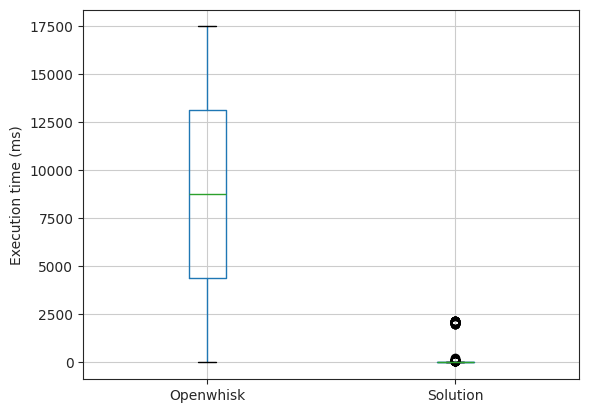

In [ ]:
print("Openwhisk Mean: "+str(subset['elapsed'].mean()))
print("Openwhisk Std: "+str(subset['elapsed'].std()))
print("Solution Mean: "+str(results2['run_time'].mean()))
print("Solution Std: "+str(results2['run_time'].std()))
box = pd.DataFrame({"Openwhisk":subset['elapsed'],"Solution":results2['run_time']})
box = interQuartile(box)
box = interQuartile(box)
box = interQuartile(box)
box.boxplot(['Openwhisk','Solution'])
plt.ylabel('Execution time (ms)')

In [ ]:
results2.describe()

,run_time
count,50000.000000
mean,1.852505
std,42.818197
min,0.874003
25%,0.897084
50%,0.919965
75%,0.942928
max,2179.634798


In [ ]:
results2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_time  50000 non-null  object 
 1   end_time    50000 non-null  object 
 2   run_time    50000 non-null  float64
 3   container   50000 non-null  object 
 4   function    50000 non-null  object 
 5   type        50000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
results2.type.value_counts()

,count
type,
warm,35750
cold,14250


In [ ]:
!pip install squarify

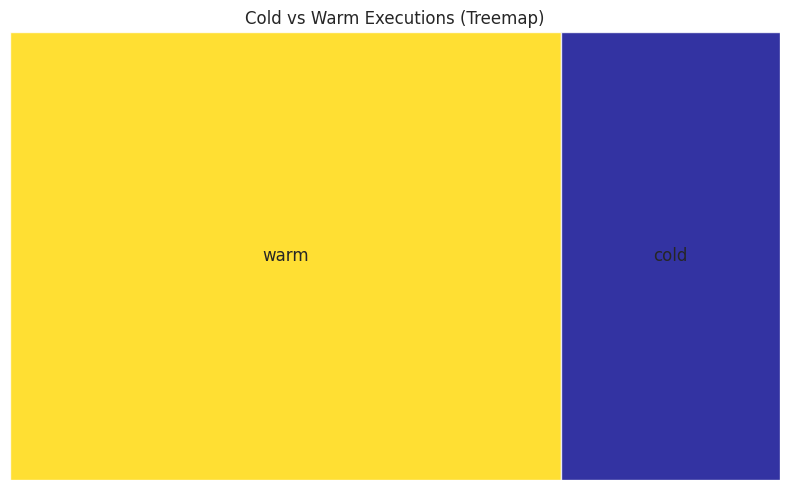

In [ ]:
import squarify

type_counts = results2['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

plt.figure(figsize=(8,5))
colors = ["#FFD700", "#00008B"]  # Yellow and Dark Blue
squarify.plot(sizes=type_counts['Events'], label=type_counts['Execution Type'],
              color=colors, alpha=0.8, text_kwargs={'fontsize':12})
plt.title("Cold vs Warm Executions (Treemap)")
plt.axis('off')
plt.tight_layout()
plt.show()

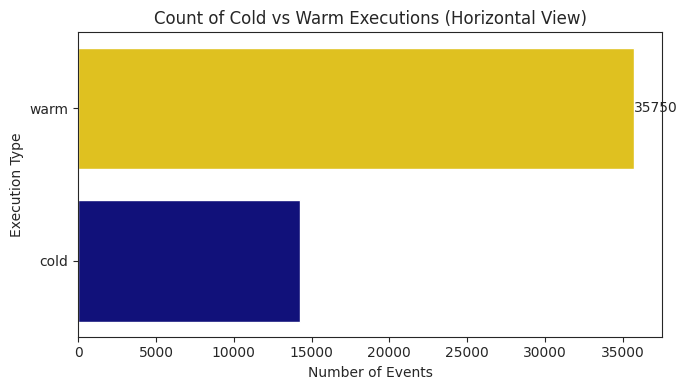

In [ ]:
type_counts = results2['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

sns.set_style("ticks")

plt.figure(figsize=(7,4))
ax = sns.barplot(data=type_counts, y='Execution Type', x='Events', palette=["#FFD700", "#00008B"])
plt.title("Count of Cold vs Warm Executions (Horizontal View)")
plt.xlabel("Number of Events")
plt.ylabel("Execution Type")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

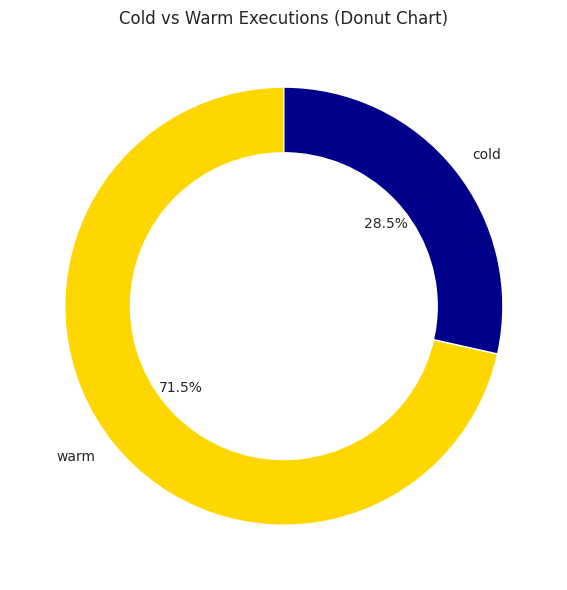

In [ ]:
type_counts = results2['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

plt.figure(figsize=(6, 6))
colors = ["#FFD700", "#00008B"]  # Yellow and Dark Blue

# Create pie chart (first step for donut)
plt.pie(type_counts['Events'], labels=type_counts['Execution Type'], autopct='%1.1f%%',
        colors=colors, startangle=90)

# Create a donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Cold vs Warm Executions (Donut Chart)')
plt.tight_layout()
plt.show()

#Experiment2

In [ ]:
results3 = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_2_results.csv')
results3.head()

,start_time,end_time,run_time,container,function,type
0,06:30:00,06:30:00,927,experiment_serverless_3_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
1,06:30:00,06:30:00,912,experiment_serverless_3_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
2,06:30:00,06:30:00,601,experiment_serverless_3_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
3,06:30:00,06:30:00,942,experiment_serverless_3_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
4,06:30:00,06:30:01,1533,experiment_serverless_3_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm


In [ ]:
# Load data and drop extra columns
data = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_2_logs.csv')
results3 = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_2_results.csv')
data = data.drop(columns=data.columns[17:])
data = data[['timeStamp', 'elapsed', 'label', 'success']]

# Convert 'timeStamp' directly to datetime
data['toDate'] = pd.to_datetime(data['timeStamp'], errors='coerce')
data['elapsed'] = pd.to_numeric(data['elapsed'], errors='coerce')


data = data.dropna(subset=['toDate', 'elapsed'])
print("After dropna:", data.shape)

available_years = data['toDate'].dt.year.unique()
print("Available years in data:", available_years)
if len(available_years) == 0:
    raise ValueError("No valid years found in timestamps. Check timestamp unit or data content.")

available_year = data['toDate'].dt.year.mode().iloc[0]
print("Using year for filtering:", available_year)

data = data.set_index('toDate')
data = data.loc[str(available_year)]
print(f"After year {available_year} filtering:", data.shape)

data = data[data['elapsed'] < 17500]
print("After removing elapsed >= 17500:", data.shape)

top_n = min(len(data), 78451)
data = data.loc[data['elapsed'].isin(data['elapsed'].nlargest(top_n))]
print(f"After keeping top {top_n} elapsed values:", data.shape)

# Find most frequent label
if data.empty:
    raise ValueError("No data left after elapsed filtering.")
most_frequent_label = data['label'].value_counts().idxmax()
print("Most frequent label:", most_frequent_label)
data = data[data['label'] == most_frequent_label]
print("After filtering by most frequent label:", data.shape)
print("Length of results3:", len(results3))
if len(data) >= 20000 + len(results3):
    data = data.iloc[20000:20000+len(results3)]
    print("After slicing to match results3:", data.shape)
else:
    print(f"Only {len(data)} records available — skipping slice, using all.")
    data = data.copy()
    print("After fallback to available records:", data.shape)


# Add sequential counter
data['counter'] = range(1, len(data) + 1)
data = data.set_index('counter')

# Final subset
subset = data[['elapsed', 'label', 'timeStamp']].copy()
subset['datetime'] = data.index

# Final report
print("Final subset shape:", subset.shape)
display(subset.head())
print(subset['elapsed'].describe())

After dropna: (50000, 5)
Available years in data: [2025]
Using year for filtering: 2025
After year 2025 filtering: (50000, 4)
After removing elapsed >= 17500: (17500, 4)
After keeping top 17500 elapsed values: (17500, 4)
Most frequent label: Invoke Serverless Function
After filtering by most frequent label: (17500, 4)
Length of results3: 50000
Only 17500 records available — skipping slice, using all.
After fallback to available records: (17500, 4)
Final subset shape: (17500, 4)


,elapsed,label,timeStamp,datetime
counter,,,,
1,0,Invoke Serverless Function,2025-10-17 10:51:41.816435+00:00,1
2,1,Invoke Serverless Function,2025-10-17 10:51:41.816436+00:00,2
3,2,Invoke Serverless Function,2025-10-17 10:51:41.816438+00:00,3
4,3,Invoke Serverless Function,2025-10-17 10:51:41.816439+00:00,4
5,4,Invoke Serverless Function,2025-10-17 10:51:41.816441+00:00,5


count    17500.000000
mean      8749.500000
std       5051.959191
min          0.000000
25%       4374.750000
50%       8749.500000
75%      13124.250000
max      17499.000000
Name: elapsed, dtype: float64


In [ ]:
subset.elapsed.describe()

,elapsed
count,17500.000000
mean,8749.500000
std,5051.959191
min,0.000000
25%,4374.750000
50%,8749.500000
75%,13124.250000
max,17499.000000


In [ ]:
results3.run_time.describe()

,run_time
count,50000.000000
mean,1277.426480
std,708.510494
min,50.000000
25%,661.000000
50%,1279.000000
75%,1893.000000
max,2499.000000


In [ ]:
subset['elapsed'][:125]

,elapsed
counter,
1,0
2,1
3,2
4,3
5,4
...,...
121,120
122,121
123,122


In [ ]:
results3['run_time'][:125]

,run_time
0,927
1,912
2,601
3,942
4,1533
...,...
120,1201
121,1067
122,2316
123,1059


In [ ]:
def interQuartile(df_):
  for x in ['Openwhisk']:
      q75,q25 = np.percentile(df_.loc[:,x],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      df_.loc[df_[x] < min,x] = np.nan
      df_.loc[df_[x] > max,x] = np.nan

  df_ = df_.dropna(axis = 0)
  df_.isnull().sum()
  return df_

Openwhisk Mean: 8749.5
Openwhisk Std: 5051.959190914617
Solution Mean: 1277.42648
Solution Std: 708.5104943310424


Text(0, 0.5, 'Execution time (ms)')

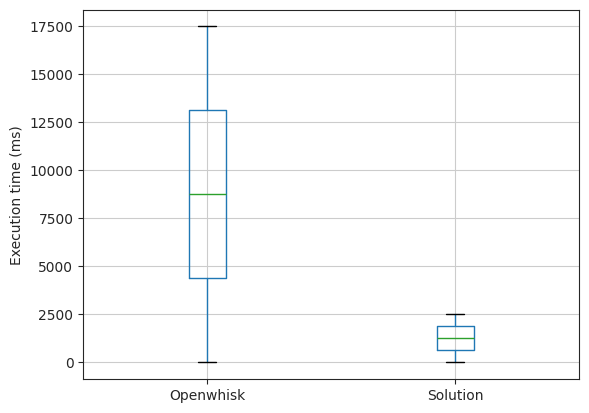

In [ ]:
print("Openwhisk Mean: "+str(subset['elapsed'].mean()))
print("Openwhisk Std: "+str(subset['elapsed'].std()))
print("Solution Mean: "+str(results3['run_time'].mean()))
print("Solution Std: "+str(results3['run_time'].std()))
box = pd.DataFrame({"Openwhisk":subset['elapsed'],"Solution":results3['run_time']})
box = interQuartile(box)
box = interQuartile(box)
box = interQuartile(box)
box.boxplot(['Openwhisk','Solution'])
plt.ylabel('Execution time (ms)')

In [ ]:
results3.describe()

,run_time
count,50000.000000
mean,1277.426480
std,708.510494
min,50.000000
25%,661.000000
50%,1279.000000
75%,1893.000000
max,2499.000000


In [ ]:
results3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_time  50000 non-null  object
 1   end_time    50000 non-null  object
 2   run_time    50000 non-null  int64 
 3   container   50000 non-null  object
 4   function    50000 non-null  object
 5   type        50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
results3.type.value_counts()

,count
type,
warm,40978
cold,9022


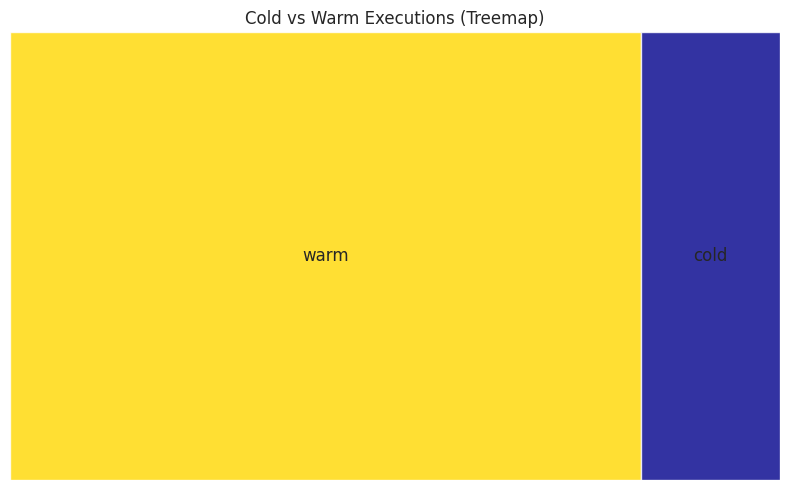

In [ ]:
import squarify

type_counts = results3['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

plt.figure(figsize=(8,5))
colors = ["#FFD700", "#00008B"]  # Yellow and Dark Blue
squarify.plot(sizes=type_counts['Events'], label=type_counts['Execution Type'],
              color=colors, alpha=0.8, text_kwargs={'fontsize':12})
plt.title("Cold vs Warm Executions (Treemap)")
plt.axis('off')
plt.tight_layout()
plt.show()

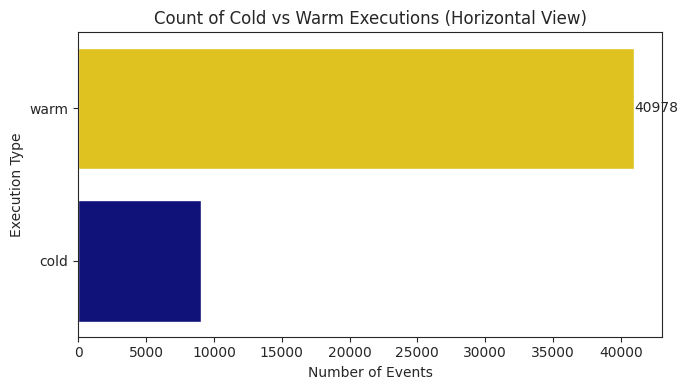

In [ ]:
type_counts = results3['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

sns.set_style("ticks")

plt.figure(figsize=(7,4))
ax = sns.barplot(data=type_counts, y='Execution Type', x='Events', palette=["#FFD700", "#00008B"])
plt.title("Count of Cold vs Warm Executions (Horizontal View)")
plt.xlabel("Number of Events")
plt.ylabel("Execution Type")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

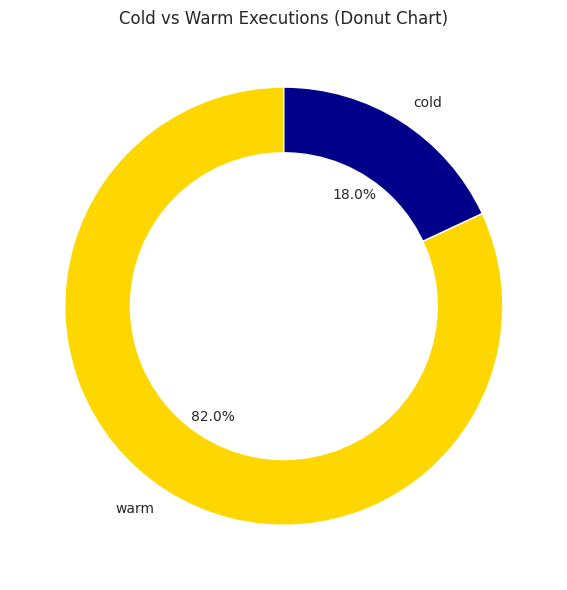

In [ ]:
type_counts = results3['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

plt.figure(figsize=(6, 6))
colors = ["#FFD700", "#00008B"]  # Yellow and Dark Blue

# Create pie chart (first step for donut)
plt.pie(type_counts['Events'], labels=type_counts['Execution Type'], autopct='%1.1f%%',
        colors=colors, startangle=90)

# Create a donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Cold vs Warm Executions (Donut Chart)')
plt.tight_layout()
plt.show()

#Experiment3

In [ ]:
results4 = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_3_results.csv')
results4.head()

,start_time,end_time,run_time,container,function,type
0,06:30:00,06:30:02,2014,experiment_serverless_4_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
1,06:30:00,06:30:00,914,experiment_serverless_4_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
2,06:30:00,06:30:00,925,experiment_serverless_4_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
3,06:30:00,06:30:00,720,experiment_serverless_4_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm
4,06:30:00,06:30:01,1562,experiment_serverless_4_experiment_serverless_...,/home/ubuntu/project/openwhisk/test_function.py,warm


In [ ]:
import pandas as pd
import numpy as np

# Load data and drop extra columns
data = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_3_logs.csv')
results4 = pd.read_csv('/content/drive/MyDrive/mohan_ml_cold_start/results/experiment_3_results.csv')
data = data.drop(columns=data.columns[17:])
data = data[['timeStamp', 'elapsed', 'label', 'success']]

# Convert 'timeStamp' directly to datetime
data['toDate'] = pd.to_datetime(data['timeStamp'], errors='coerce')
data['elapsed'] = pd.to_numeric(data['elapsed'], errors='coerce')

data = data.dropna(subset=['toDate', 'elapsed'])
print("After dropna:", data.shape)

available_years = data['toDate'].dt.year.unique()
print("Available years in data:", available_years)
if len(available_years) == 0:
    raise ValueError("No valid years found in timestamps. Check timestamp unit or data content.")

available_year = data['toDate'].dt.year.mode().iloc[0]
print("Using year for filtering:", available_year)

data = data.set_index('toDate')
data = data.loc[str(available_year)]
print(f"After year {available_year} filtering:", data.shape)

data = data[data['elapsed'] < 17500]
print("After removing elapsed >= 17500:", data.shape)

top_n = min(len(data), 78451)
data = data.loc[data['elapsed'].isin(data['elapsed'].nlargest(top_n))]
print(f"After keeping top {top_n} elapsed values:", data.shape)

# Find most frequent label
if data.empty:
    raise ValueError("No data left after elapsed filtering.")
most_frequent_label = data['label'].value_counts().idxmax()
print("Most frequent label:", most_frequent_label)
data = data[data['label'] == most_frequent_label]
print("After filtering by most frequent label:", data.shape)
print("Length of results4:", len(results4))
if len(data) >= 20000 + len(results4):
    data = data.iloc[20000:20000+len(results4)]
    print("After slicing to match results4:", data.shape)
else:
    print(f"Only {len(data)} records available — skipping slice, using all.")
    data = data.copy()
    print("After fallback to available records:", data.shape)

# Add sequential counter
data['counter'] = range(1, len(data) + 1)
data = data.set_index('counter')

# Final subset
subset = data[['elapsed', 'label', 'timeStamp']].copy()
subset['datetime'] = data.index

# Final report
print("Final subset shape:", subset.shape)
display(subset.head())
print(subset['elapsed'].describe())

After dropna: (50000, 5)
Available years in data: [2025]
Using year for filtering: 2025
After year 2025 filtering: (50000, 4)
After removing elapsed >= 17500: (17500, 4)
After keeping top 17500 elapsed values: (17500, 4)
Most frequent label: Invoke Serverless Function
After filtering by most frequent label: (17500, 4)
Length of results4: 50000
Only 17500 records available — skipping slice, using all.
After fallback to available records: (17500, 4)
Final subset shape: (17500, 4)


,elapsed,label,timeStamp,datetime
counter,,,,
1,0,Invoke Serverless Function,2025-10-17 10:51:45.040238+00:00,1
2,1,Invoke Serverless Function,2025-10-17 10:51:45.040239+00:00,2
3,2,Invoke Serverless Function,2025-10-17 10:51:45.040241+00:00,3
4,3,Invoke Serverless Function,2025-10-17 10:51:45.040242+00:00,4
5,4,Invoke Serverless Function,2025-10-17 10:51:45.040244+00:00,5


count    17500.000000
mean      8749.500000
std       5051.959191
min          0.000000
25%       4374.750000
50%       8749.500000
75%      13124.250000
max      17499.000000
Name: elapsed, dtype: float64


In [ ]:
subset.elapsed.describe()

,elapsed
count,17500.000000
mean,8749.500000
std,5051.959191
min,0.000000
25%,4374.750000
50%,8749.500000
75%,13124.250000
max,17499.000000


In [ ]:
results4.run_time.describe()

,run_time
count,50000.000000
mean,1269.574840
std,705.250844
min,50.000000
25%,657.000000
50%,1267.000000
75%,1880.000000
max,2499.000000


In [ ]:
subset['elapsed'][:125]

,elapsed
counter,
1,0
2,1
3,2
4,3
5,4
...,...
121,120
122,121
123,122


In [ ]:
results4['run_time'][:125]

,run_time
0,2014
1,914
2,925
3,720
4,1562
...,...
120,909
121,1852
122,2070
123,1901


In [ ]:
def interQuartile(df_):
  for x in ['Openwhisk']:
      q75,q25 = np.percentile(df_.loc[:,x],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      df_.loc[df_[x] < min,x] = np.nan
      df_.loc[df_[x] > max,x] = np.nan

  df_ = df_.dropna(axis = 0)
  df_.isnull().sum()
  return df_

Openwhisk Mean: 8749.5
Openwhisk Std: 5051.959190914617
Solution Mean: 1269.57484
Solution Std: 705.250844206542


Text(0, 0.5, 'Execution time (ms)')

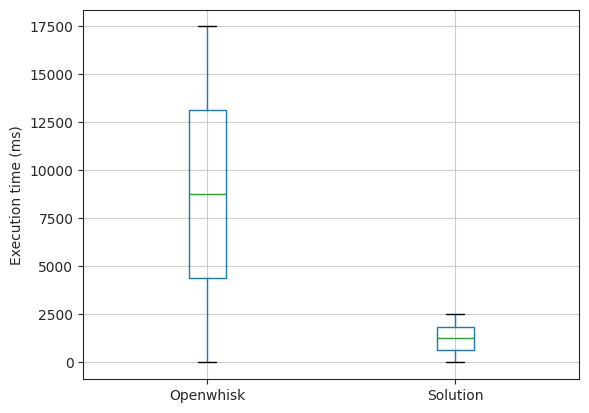

In [ ]:
print("Openwhisk Mean: "+str(subset['elapsed'].mean()))
print("Openwhisk Std: "+str(subset['elapsed'].std()))
print("Solution Mean: "+str(results4['run_time'].mean()))
print("Solution Std: "+str(results4['run_time'].std()))
box = pd.DataFrame({"Openwhisk":subset['elapsed'],"Solution":results4['run_time']})
box = interQuartile(box)
box = interQuartile(box)
box = interQuartile(box)
box.boxplot(['Openwhisk','Solution'])
plt.ylabel('Execution time (ms)')

In [ ]:
results4.describe()

,run_time
count,50000.000000
mean,1269.574840
std,705.250844
min,50.000000
25%,657.000000
50%,1267.000000
75%,1880.000000
max,2499.000000


In [ ]:
results4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_time  50000 non-null  object
 1   end_time    50000 non-null  object
 2   run_time    50000 non-null  int64 
 3   container   50000 non-null  object
 4   function    50000 non-null  object
 5   type        50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
results4.type.value_counts()

,count
type,
warm,45460
cold,4540


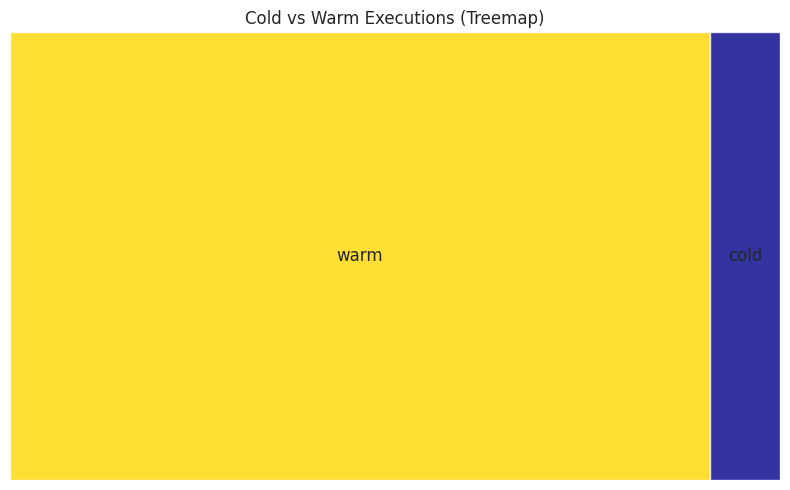

In [ ]:
import squarify

type_counts = results4['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

plt.figure(figsize=(8,5))
colors = ["#FFD700", "#00008B"]  # Yellow and Dark Blue
squarify.plot(sizes=type_counts['Events'], label=type_counts['Execution Type'],
              color=colors, alpha=0.8, text_kwargs={'fontsize':12})
plt.title("Cold vs Warm Executions (Treemap)")
plt.axis('off')
plt.tight_layout()
plt.show()

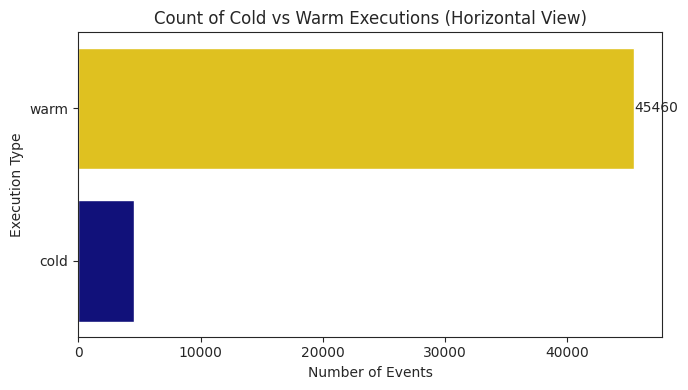

In [ ]:
type_counts = results4['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

sns.set_style("ticks")

plt.figure(figsize=(7,4))
ax = sns.barplot(data=type_counts, y='Execution Type', x='Events', palette=["#FFD700", "#00008B"])
plt.title("Count of Cold vs Warm Executions (Horizontal View)")
plt.xlabel("Number of Events")
plt.ylabel("Execution Type")
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

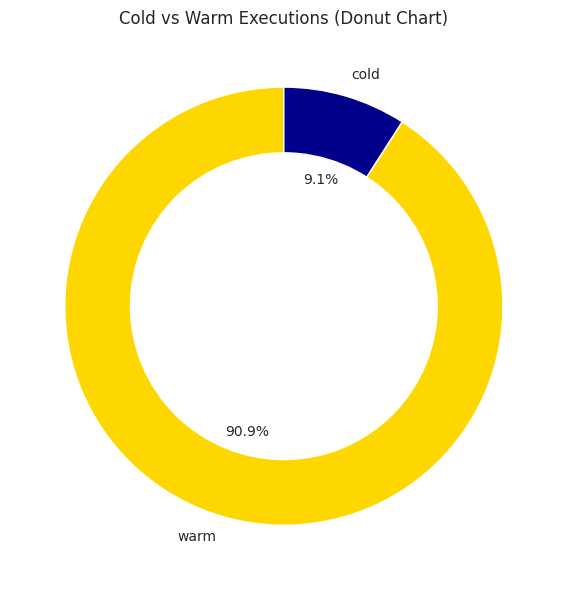

In [ ]:
type_counts = results4['type'].value_counts().reset_index()
type_counts.columns = ['Execution Type', 'Events']

plt.figure(figsize=(6, 6))
colors = ["#FFD700", "#00008B"]  # Yellow and Dark Blue

# Create pie chart (first step for donut)
plt.pie(type_counts['Events'], labels=type_counts['Execution Type'], autopct='%1.1f%%',
        colors=colors, startangle=90)

# Create a donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Cold vs Warm Executions (Donut Chart)')
plt.tight_layout()
plt.show()